In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mahalle_bina.csv", encoding = "ISO-8859-9", sep=";")
data

,ilce_adi,mahalle_adi,mahalle_uavt,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi
0,ADALAR,BURGAZADA,40139,433,214,173,802,18,0
1,ADALAR,HEYBELİADA,40142,836,347,212,1359,36,0
2,ADALAR,KINALIADA,40143,610,244,158,923,89,0
3,ADALAR,MADEN,40140,863,510,308,1637,44,0
4,ADALAR,NİZAM,40141,842,426,217,1434,51,0
...,...,...,...,...,...,...,...,...,...
954,ZEYTİNBURNU,SÜMER,40831,53,1025,223,252,989,60
955,ZEYTİNBURNU,TELSİZ,40839,567,763,710,596,1443,1
956,ZEYTİNBURNU,VELİEFENDİ,40836,92,1020,185,418,879,0
957,ZEYTİNBURNU,YENİDOĞAN,40833,31,450,67,109,438,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ilce_adi         959 non-null    object
 1   mahalle_adi      959 non-null    object
 2   mahalle_uavt     959 non-null    int64 
 3   1980_oncesi      959 non-null    int64 
 4   1980-2000_arasi  959 non-null    int64 
 5   2000_sonrasi     959 non-null    int64 
 6   1-4 kat_arasi    959 non-null    int64 
 7   5-9 kat_arasi    959 non-null    int64 
 8   9-19 kat_arasi   959 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 67.6+ KB


In [4]:
data.isnull().sum()

ilce_adi           0
mahalle_adi        0
mahalle_uavt       0
1980_oncesi        0
1980-2000_arasi    0
2000_sonrasi       0
1-4 kat_arasi      0
5-9 kat_arasi      0
9-19 kat_arasi     0
dtype: int64

veri setindeki ilçelerde kaç tane mahalle olduğunu görşelleştirerek daha fazla mahalle sayısına sahip olan ilçelerin belirlenmesi

In [5]:
data_ileceler= data["ilce_adi"].value_counts().sort_values(ascending=False)
data_ileceler

ilce_adi
ŞİLE             62
FATİH            57
BEYKOZ           45
BEYOĞLU          45
ESENYURT         43
ÇATALCA          39
SARIYER          38
ARNAVUTKÖY       38
PENDİK           36
ÜMRANİYE         35
SİLİVRİ          35
ÜSKÜDAR          33
EYÜP             28
ŞİŞLİ            25
BÜYÜKÇEKMECE     24
BEŞİKTAŞ         23
BAĞCILAR         22
KADIKÖY          21
ÇEKMEKÖY         21
KÜÇÜKÇEKMECE     21
KARTAL           20
KAĞITHANE        19
SANCAKTEPE       19
MALTEPE          18
TUZLA            17
ATAŞEHİR         17
ESENLER          16
GAZİOSMANPAŞA    16
BAKIRKÖY         15
SULTANBEYLİ      15
SULTANGAZİ       15
ZEYTİNBURNU      13
GÜNGÖREN         11
BAYRAMPAŞA       11
BAHÇELİEVLER     11
BEYLİKDÜZÜ       10
BAŞAKŞEHİR       10
AVCILAR          10
ADALAR            5
Name: count, dtype: int64

In [6]:
data_ileceler.index

Index(['ŞİLE', 'FATİH', 'BEYKOZ', 'BEYOĞLU', 'ESENYURT', 'ÇATALCA', 'SARIYER',
       'ARNAVUTKÖY', 'PENDİK', 'ÜMRANİYE', 'SİLİVRİ', 'ÜSKÜDAR', 'EYÜP',
       'ŞİŞLİ', 'BÜYÜKÇEKMECE', 'BEŞİKTAŞ', 'BAĞCILAR', 'KADIKÖY', 'ÇEKMEKÖY',
       'KÜÇÜKÇEKMECE', 'KARTAL', 'KAĞITHANE', 'SANCAKTEPE', 'MALTEPE', 'TUZLA',
       'ATAŞEHİR', 'ESENLER', 'GAZİOSMANPAŞA', 'BAKIRKÖY', 'SULTANBEYLİ',
       'SULTANGAZİ', 'ZEYTİNBURNU', 'GÜNGÖREN', 'BAYRAMPAŞA', 'BAHÇELİEVLER',
       'BEYLİKDÜZÜ', 'BAŞAKŞEHİR', 'AVCILAR', 'ADALAR'],
      dtype='object', name='ilce_adi')

Text(0.5, 0, 'İlçe İsimleri')

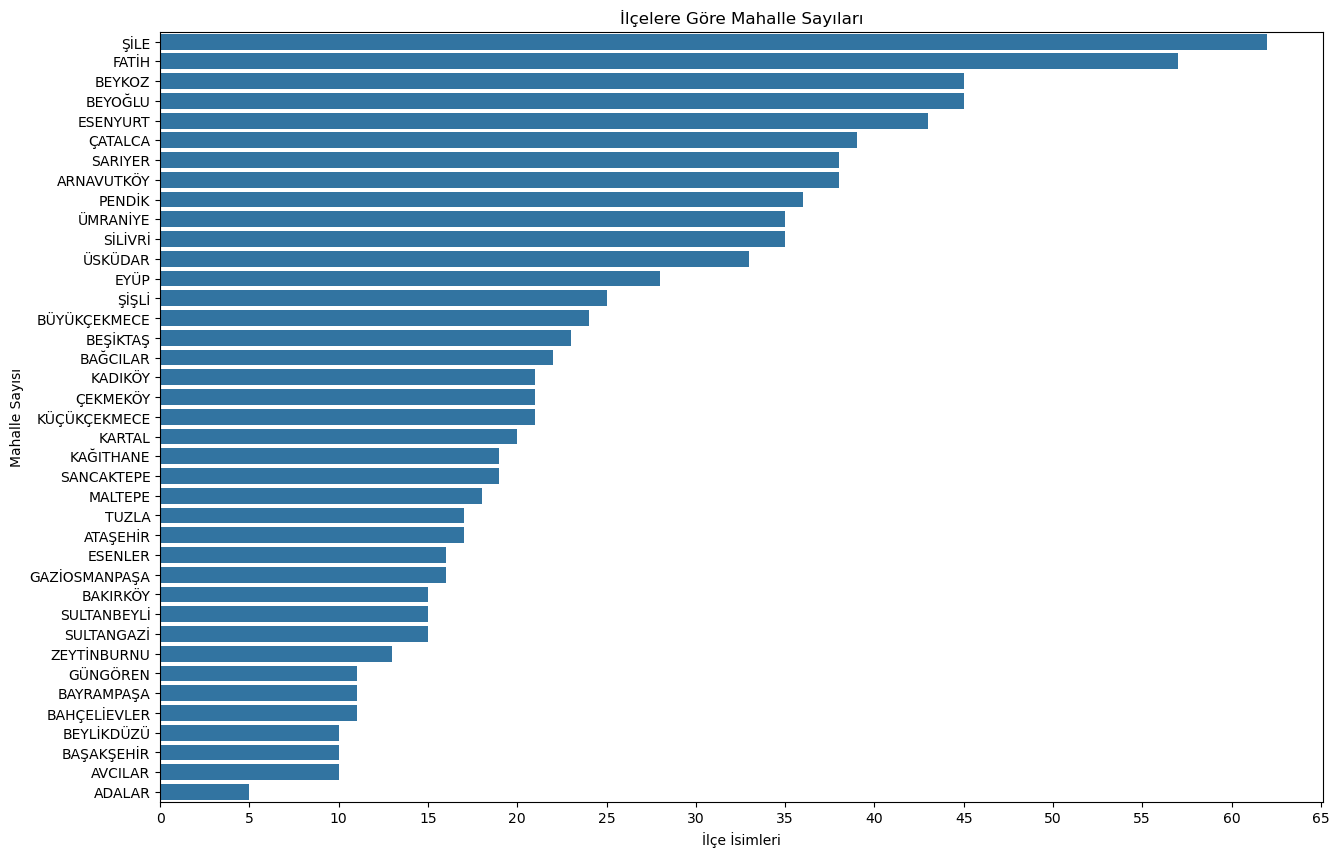

In [9]:
plt.figure(figsize=(15,10))
plt.title('İlçelere Göre Mahalle Sayıları')
plt.xticks(np.arange(0, data_ileceler[0] + 10, step=5))
sns.barplot(x = data_ileceler, y = data_ileceler.index)
plt.ylabel("Mahalle Sayısı")
plt.xlabel("İlçe İsimleri")

İlçelerde Bulunan Toplam Ev Sayısının Görselleştirilmesi

In [35]:
data["toplam_ev"] = data["1980_oncesi"] + data["1980-2000_arasi"] + data["2000_sonrasi"]
data

,ilce_adi,mahalle_adi,mahalle_uavt,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,toplam_ev
0,ADALAR,BURGAZADA,40139,433,214,173,802,18,0,820
1,ADALAR,HEYBELİADA,40142,836,347,212,1359,36,0,1395
2,ADALAR,KINALIADA,40143,610,244,158,923,89,0,1012
3,ADALAR,MADEN,40140,863,510,308,1637,44,0,1681
4,ADALAR,NİZAM,40141,842,426,217,1434,51,0,1485
...,...,...,...,...,...,...,...,...,...,...
954,ZEYTİNBURNU,SÜMER,40831,53,1025,223,252,989,60,1301
955,ZEYTİNBURNU,TELSİZ,40839,567,763,710,596,1443,1,2040
956,ZEYTİNBURNU,VELİEFENDİ,40836,92,1020,185,418,879,0,1297
957,ZEYTİNBURNU,YENİDOĞAN,40833,31,450,67,109,438,1,548


ilçelere göre toplam ev sayısı, artandan azalan sıra

In [27]:
a = data.groupby(["ilce_adi"])["toplam_ev"].sum().sort_values(ascending=False)
a

ilce_adi
ÜMRANİYE         52612
PENDİK           51491
BEYKOZ           51201
SİLİVRİ          50014
SARIYER          49360
FATİH            43560
BAĞCILAR         42439
ÜSKÜDAR          41731
KÜÇÜKÇEKMECE     40136
ESENYURT         38685
EYÜP             34363
SULTANGAZİ       33947
SULTANBEYLİ      33911
ARNAVUTKÖY       31941
BÜYÜKÇEKMECE     31343
SANCAKTEPE       30293
KARTAL           29962
GAZİOSMANPAŞA    29283
KAĞITHANE        29103
MALTEPE          28742
TUZLA            28331
ATAŞEHİR         27583
BEYOĞLU          27335
ÇATALCA          27293
AVCILAR          26762
BAŞAKŞEHİR       25791
KADIKÖY          25210
ESENLER          23661
BAHÇELİEVLER     23276
BAYRAMPAŞA       20952
ÇEKMEKÖY         20787
ŞİŞLİ            20689
ŞİLE             20102
BEŞİKTAŞ         16037
ZEYTİNBURNU      16000
BEYLİKDÜZÜ       12753
BAKIRKÖY         11950
GÜNGÖREN         10914
ADALAR            6393
Name: toplam_ev, dtype: int64

kat sayılarına göre ilçelere düşen bina sayısı

In [12]:
a= 5
b= 19

In [13]:
ev_sene = list([a,b])
ev_sene

[5, 19]

In [ ]:
cinsiyet = ["Erkek", "Kadın"]
sayi = cinsiyet_sayi.to_list()
colors = ["b", "#FF6EC7"]

csfont = {'fontname':'serif'}


plt.figure(figsize=(10,6))
plt.pie(sayi, labels=cinsiyet, colors=colors, shadow=True, explode=(0.05, 0.05), autopct= "%1.1f%%", )
plt.title("Karakterlerin cinsiyetlere göre oranı", **csfont)
plt.show()

In [34]:
bir_dort = data.groupby(["ilce_adi"])[["1-4 kat_arasi","5-9 kat_arasi", "9-19 kat_arasi"]].sum().sort_values(by="9-19 kat_arasi", ascending=False)
bir_dort

,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi
ilce_adi,,,
KADIKÖY,9423,10990,4797
PENDİK,34823,14028,2640
BAŞAKŞEHİR,21176,2329,2286
BEYLİKDÜZÜ,8054,2921,1778
ÜMRANİYE,35899,15091,1622
KARTAL,17232,11255,1475
ESENYURT,18305,19063,1317
ATAŞEHİR,18774,7543,1266
ŞİŞLİ,7237,12267,1185


In [ ]:
ilceler = ilce.index.to_list()
ilceler

['ŞİLE',
 'FATİH',
 'BEYKOZ',
 'BEYOĞLU',
 'ESENYURT',
 'ÇATALCA',
 'SARIYER',
 'ARNAVUTKÖY',
 'PENDİK',
 'SİLİVRİ',
 'ÜMRANİYE',
 'ÜSKÜDAR',
 'EYÜP',
 'ŞİŞLİ',
 'BÜYÜKÇEKMECE',
 'BEŞİKTAŞ',
 'BAĞCILAR',
 'KÜÇÜKÇEKMECE',
 'KADIKÖY',
 'ÇEKMEKÖY',
 'KARTAL',
 'KAĞITHANE',
 'SANCAKTEPE',
 'MALTEPE',
 'TUZLA',
 'ATAŞEHİR',
 'ESENLER',
 'GAZİOSMANPAŞA',
 'SULTANGAZİ',
 'SULTANBEYLİ',
 'BAKIRKÖY',
 'ZEYTİNBURNU',
 'GÜNGÖREN',
 'BAYRAMPAŞA',
 'BAHÇELİEVLER',
 'BEYLİKDÜZÜ',
 'BAŞAKŞEHİR',
 'AVCILAR',
 'ADALAR']

In [ ]:
tüm_ilce = []

for i in data["ilce_adi"]:
  tüm_ilce.append(i)

In [ ]:
mahalle_sayi =[]

for i in ilceler:
  mahalle_sayi.append(tüm_ilce.count(i))

In [ ]:
data1 = [[ilceler,mahalle_sayi]]